# Benchmarking
env speechtotext

## <span style="color:lightblue">Installation des dépendances</span>


In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## <span style="color:lightblue">Importation des dépendances</span>


In [20]:
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from sklearn.metrics import confusion_matrix

from utils import extract_annotations_from_file, extract_predictions_from_file, prepare_confusion_matrix, plot_confusion_matrix

## <span style="color:lightblue">Code principale</span>


### <span style="color:lightgreen">Environnement</span>


In [21]:
# ANNOTATIONS_FILE_PATH = "../data/dataset4/test/result.json"
# PREDICTIONS_FILE_PATH = "../yolo/predictions/predictions_i7-11800H_yolo11n_trained.pt.json"

In [94]:
ANNOTATIONS_FILE_PATH = "../data/test/result.json"
PREDICTIONS_FILE_PATH = "./predictions/predictions_RTX 3080 TI laptop 95W_fasterrcnn_custom_new.pt.json"

### <span style="color:lightgreen">Récupération des données</span>


In [95]:
y_true, class_names = extract_annotations_from_file(ANNOTATIONS_FILE_PATH)
y_pred, y_scores = extract_predictions_from_file(ANNOTATIONS_FILE_PATH, PREDICTIONS_FILE_PATH)
coco_annotations = COCO(ANNOTATIONS_FILE_PATH)
coco_predictions = coco_annotations.loadRes(PREDICTIONS_FILE_PATH)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


### <span style="color:lightgreen">mAP</span>


Initialiser l'évaluation


In [96]:
coco_eval = COCOeval(coco_annotations, coco_predictions, iouType="bbox")

Calculer le mAP


In [97]:
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.389
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.597
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.312
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.588
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.537
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.537
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.537
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

### <span style="color:lightgreen">Matrice de confusion</span>


Préparation des données pour la matrice de confusion.


In [98]:
y_true_flat, y_pred_flat, classes = prepare_confusion_matrix(y_true, y_pred, class_names)

Ajout d'une classe 'background' lorsque rien n'est détecté.


In [99]:
class_names.append("background")

Calcul de la matrice de confusion.


In [100]:
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=classes)

Afficher la matrice de confusion.


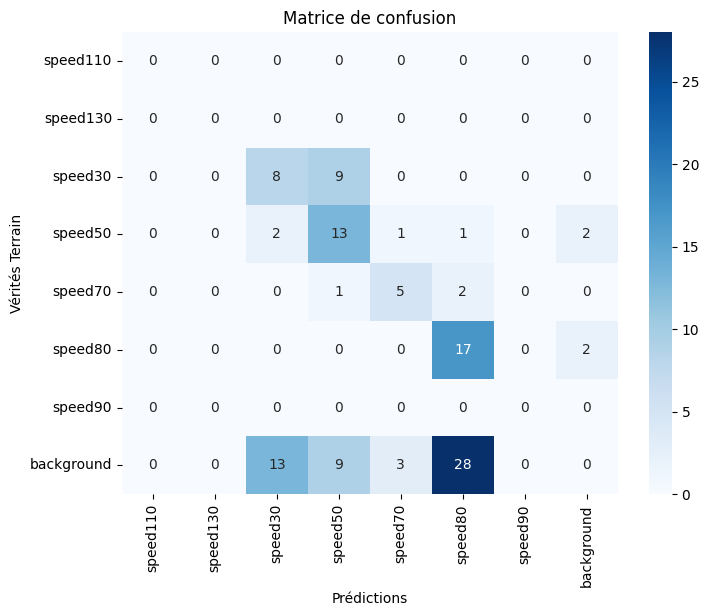

In [101]:
plot_confusion_matrix(cm, "d", class_names, "Matrice de confusion")

Afficher la matrice de confusion normalisée.


C:\Users\SONG\AppData\Local\Temp\ipykernel_31472\1383267072.py:1: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


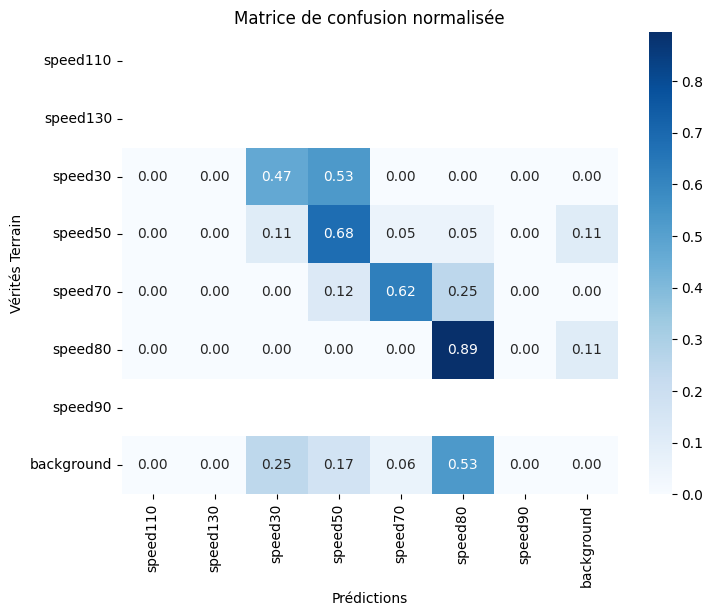

In [102]:
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_normalized, ".2f", class_names, "Matrice de confusion normalisée")